In [2]:
import pandas as pd

In [3]:
beerdata = pd.read_csv("BeerDataScienceProject.csv", encoding = "ISO-8859-1")

In [36]:
beerdata

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206
...,...,...,...,...,...,...,...,...,...,...,...,...,...
528865,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,3.5,orangemoustache,4.0,"A-pours a reddish amber that looks very nice,l...",1205212721
528866,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.5,3.0,3.0,MisterStout,3.0,I don't really have anything special to say ab...,1203490783
528867,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,4.0,4.5,4.0,meechum,4.5,Had this on tap at Vreny's Beirgarten A - Came...,1201320897
528868,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,4.0,Dodo2step,4.5,"Purchased at Market Cross Pub in carlisle, PA....",1201215290


In [9]:
beerdata.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text', 'review_time'],
      dtype='object')

### 1.	Rank top 3 Breweries which produce the strongest beers?  


In [4]:
#sort by 'beer ABV' in descending order
data1 = beerdata.sort_values(by = ['beer_ABV'], ascending = False)

In [22]:
data1[['beer_brewerId', 'beer_ABV', 'beer_name']]

,beer_brewerId,beer_ABV,beer_name
12889,6513,57.70,Schorschbräu Schorschbock 57%
12909,6513,43.00,Schorschbräu Schorschbock 43%
12910,6513,43.00,Schorschbräu Schorschbock 43%
12911,6513,39.44,Schorschbräu Schorschbock 40%
12913,6513,39.44,Schorschbräu Schorschbock 40%
...,...,...,...
528865,3340,NaN,Dinkel Acker Dark
528866,3340,NaN,Dinkel Acker Dark
528867,3340,NaN,Dinkel Acker Dark
528868,3340,NaN,Dinkel Acker Dark


In [30]:
#get top three unique brewery IDs
data1['beer_brewerId'].unique()[:3]

array([ 6513,    35, 16866])

### 2.	Which year did beers enjoy the highest ratings? 

In [26]:
#fill review_overall with median values
data2 = beerdata[['beer_beerId', 'review_overall', 'review_time']]
data2['review_overall'] = data2.groupby('beer_beerId').transform(lambda x: x.fillna(x.median()))

/Users/dykim/opt/anaconda3/envs/Cornell/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
data2.head()

,beer_beerId,review_overall,review_time
0,47986,1.5,1234817823
1,48213,3.0,1235915097
2,48215,3.0,1235916604
3,47969,3.0,1234725145
4,64883,4.0,1293735206


In [28]:
#groupby review time with the average of reviews
data2 = data2.groupby(['review_time'], as_index=False)['review_overall'].mean()

In [29]:
data2

,review_time,review_overall
0,884390401,4.00
1,885945601,4.50
2,886723201,4.50
3,887846401,3.75
4,888796801,4.00
...,...,...
527922,1326266601,4.50
527923,1326269375,4.00
527924,1326270764,4.00
527925,1326273614,3.00


In [30]:
#sort by average of reviews in descending order
data2.sort_values(by = ['review_overall'], ascending = False)

,review_time,review_overall
98134,1150767233,5.0
32592,1080705169,5.0
75520,1133306629,5.0
32585,1080700261,5.0
304586,1256182476,5.0
...,...,...
216752,1222833197,1.0
284393,1248279798,1.0
4258,1030197670,0.0
4275,1030266889,0.0


In [31]:
#get the review times where the average of reviews are 5.0
data3 = (data2.review_overall ==5.0)
data2[data3]

,review_time,review_overall
10,898560001,5.0
11,904089601,5.0
50,973014566,5.0
56,976047379,5.0
57,976128004,5.0
...,...,...
527862,1326252682,5.0
527867,1326253848,5.0
527885,1326256371,5.0
527886,1326256408,5.0


In [32]:
list(data2[data3]['review_time'])

[898560001,
 904089601,
 973014566,
 976047379,
 976128004,
 980861558,
 981040209,
 981041139,
 981462625,
 981565715,
 982705331,
 982879761,
 983036899,
 983219080,
 983305622,
 983310708,
 984043851,
 984758104,
 993115649,
 993251490,
 993252051,
 994615156,
 995247085,
 995247434,
 995900732,
 996323807,
 996507011,
 996601520,
 997634968,
 997635065,
 997749065,
 997783639,
 997900017,
 998089127,
 998089274,
 998349297,
 999004565,
 999004730,
 999005055,
 999005388,
 999005555,
 1000252088,
 1000334060,
 1000464943,
 1000586756,
 1000832810,
 1000840475,
 1000841387,
 1000846943,
 1000848115,
 1000859295,
 1000895060,
 1000931285,
 1001015786,
 1001093784,
 1001162809,
 1001258941,
 1001323186,
 1001410024,
 1001410380,
 1001410857,
 1001414108,
 1001607663,
 1001631278,
 1001941710,
 1001965688,
 1002143601,
 1002289206,
 1002292275,
 1002299922,
 1002470289,
 1002499201,
 1002559457,
 1002560090,
 1002561805,
 1002561998,
 1002666044,
 1002897160,
 1002902331,
 1002916110,
 

### 3.	Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?

In [36]:
data33 = beerdata[['review_taste', 'review_aroma', 'review_appearance', 'review_palette', 'review_overall']]

In [44]:
data33.fillna(data33.median())

,review_taste,review_aroma,review_appearance,review_palette,review_overall
0,1.5,1.5,2.5,2.0,1.5
1,3.0,3.0,3.0,2.5,3.0
2,3.0,3.0,3.0,2.5,3.0
3,2.5,3.0,3.5,3.0,3.0
4,4.0,4.5,4.0,4.5,4.0
...,...,...,...,...,...
528865,3.5,4.0,4.0,3.0,4.0
528866,3.0,3.0,4.0,3.5,3.0
528867,4.0,4.5,4.0,4.0,4.5
528868,4.0,4.5,4.0,3.0,4.0


In [45]:
data33

,review_taste,review_aroma,review_appearance,review_palette,review_overall
0,1.5,1.5,2.5,2.0,1.5
1,3.0,3.0,3.0,2.5,3.0
2,3.0,3.0,3.0,2.5,3.0
3,2.5,3.0,3.5,3.0,3.0
4,4.0,4.5,4.0,4.5,4.0
...,...,...,...,...,...
528865,3.5,4.0,4.0,3.0,4.0
528866,3.0,3.0,4.0,3.5,3.0
528867,4.0,4.5,4.0,4.0,4.5
528868,4.0,4.5,4.0,3.0,4.0


In [35]:
from sklearn.linear_model import LinearRegression

In [46]:
#use linear regression assuming linear relation with 'review_palette'
X = data33[['review_taste', 'review_aroma', 'review_appearance', 'review_palette']]
y = data33['review_overall']

In [47]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [48]:
#get the coefficients to see which has the highest coefficient
regressor.coef_
#the second one, which is aroma, is the most important factor for the user's ratings

array([0.25941546, 0.5531015 , 0.0330351 , 0.04492507])

### 4.	If you were to recommend 3 beers to your friends based on this data which ones will you recommend?

In [80]:
#check if any row has no beer name
beerdata['beer_name'].isna().values.any()

False

In [82]:
#check if any row has no beer Id
beerdata['beer_beerId'].isna().values.any()

False

In [93]:
data4 = beerdata.fillna(beerdata.median())

In [94]:
#'review_count' column will show how many times the beer was rated
data4['review_count'] = data4['review_profileName'].groupby(data4['beer_beerId']).transform('count')
data4['review_count'] = data4['review_count'].astype(float)
data4

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_count
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823,1.0
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097,1.0
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604,1.0
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145,1.0
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528865,6.5,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,3.5,orangemoustache,4.0,"A-pours a reddish amber that looks very nice,l...",1205212721,73.0
528866,6.5,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.5,3.0,3.0,MisterStout,3.0,I don't really have anything special to say ab...,1203490783,73.0
528867,6.5,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,4.0,4.5,4.0,meechum,4.5,Had this on tap at Vreny's Beirgarten A - Came...,1201320897,73.0
528868,6.5,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,4.0,Dodo2step,4.5,"Purchased at Market Cross Pub in carlisle, PA....",1201215290,73.0


In [95]:
#average review_overall for each beer
data4['avg_review_overall'] = data4['review_overall'].groupby(data4['beer_beerId']).transform('sum')/data4['review_count']

In [96]:
data4

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_count,avg_review_overall
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823,1.0,1.500000
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097,1.0,3.000000
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604,1.0,3.000000
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145,1.0,3.000000
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206,1.0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528865,6.5,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,3.5,orangemoustache,4.0,"A-pours a reddish amber that looks very nice,l...",1205212721,73.0,3.671233
528866,6.5,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.5,3.0,3.0,MisterStout,3.0,I don't really have anything special to say ab...,1203490783,73.0,3.671233
528867,6.5,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,4.0,4.5,4.0,meechum,4.5,Had this on tap at Vreny's Beirgarten A - Came...,1201320897,73.0,3.671233
528868,6.5,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,4.0,Dodo2step,4.5,"Purchased at Market Cross Pub in carlisle, PA....",1201215290,73.0,3.671233


In [97]:
#the mean of all reviews
mean_all_reviews = data4['avg_review_overall'].mean()
mean_all_reviews

3.8340432441828103

In [98]:
#the minimum number of ratings that the beer needs to be included in the recommendation list
min_num_ratings = data4['review_count'].quantile(0.90)
min_num_ratings

1560.0

In [99]:
#use review_count and avg_review_overall to calculate the score of each beer
rc = data4['review_count']
ar = data4['avg_review_overall']
data4['score'] = (rc/(rc+min_num_ratings)*ar) + (min_num_ratings/(min_num_ratings + rc)*mean_all_reviews)
data4

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_count,avg_review_overall,score
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823,1.0,1.500000,3.832548
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097,1.0,3.000000,3.833509
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604,1.0,3.000000,3.833509
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145,1.0,3.000000,3.833509
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206,1.0,4.000000,3.834150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528865,6.5,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,3.5,orangemoustache,4.0,"A-pours a reddish amber that looks very nice,l...",1205212721,73.0,3.671233,3.826765
528866,6.5,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.5,3.0,3.0,MisterStout,3.0,I don't really have anything special to say ab...,1203490783,73.0,3.671233,3.826765
528867,6.5,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,4.0,4.5,4.0,meechum,4.5,Had this on tap at Vreny's Beirgarten A - Came...,1201320897,73.0,3.671233,3.826765
528868,6.5,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,4.0,Dodo2step,4.5,"Purchased at Market Cross Pub in carlisle, PA....",1201215290,73.0,3.671233,3.826765


In [107]:
data4.groupby(['beer_name'])['score'].count().sort_values(ascending = False)

beer_name
Sierra Nevada Celebration Ale                 3000
Sierra Nevada Pale Ale                        2587
Founders Breakfast Stout                      2502
Sierra Nevada Bigfoot Barleywine Style Ale    2492
La Fin Du Monde                               2483
                                              ... 
Hakusekikan Smoke Ale                            1
Steamer                                          1
Hakusekikan White Ale                            1
Halcyon Daze                                     1
"100" Pale Ale                                   1
Name: score, Length: 18339, dtype: int64

### 5.	Which Beer style seems to be the favorite based on reviews written by users? 

In [13]:
data5 = beerdata[['beer_style', 'review_profileName', 'review_text', 'review_overall']]
data5.head(5)

,beer_style,review_profileName,review_text,review_overall
0,Hefeweizen,stcules,A lot of foam. But a lot. In the smell some ba...,1.5
1,English Strong Ale,stcules,"Dark red color, light beige foam, average. In ...",3.0
2,Foreign / Export Stout,stcules,"Almost totally black. Beige foam, quite compac...",3.0
3,German Pilsener,stcules,"Golden yellow color. White, compact foam, quit...",3.0
4,American Double / Imperial IPA,johnmichaelsen,"According to the website, the style for the Ca...",4.0


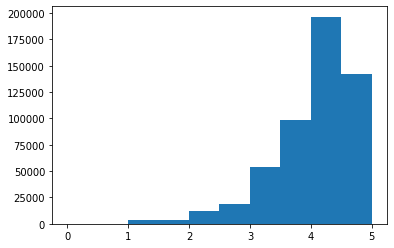

In [125]:
import matplotlib.pyplot as plt
plt.hist(data5['review_overall'])
plt.show()

In [132]:
data5['review_overall'].median()

4.0

In [15]:
data5.dropna()
reviewtext = data5.review_text.values.astype(str)

Approach 1. Use Random Forest to predict the numeric rating using reviewtext

In [5]:
#round the review_overall to make 6 classes(0, 1, 2, 3, 4, 5)
data5['review_rounded'] = round(data5['review_overall'])

/Users/dykim/opt/anaconda3/envs/Cornell/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
#BoW
from sklearn.feature_extraction.text import CountVectorizer
tdmvector = CountVectorizer()
X_train_tdm = tdmvector.fit_transform(reviewtext)
print(X_train_tdm.shape)
#TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(X_train_tdm)
print(X_train_tdm.shape)


(528870, 150278)
(528870, 150278)


In [9]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#because of kernal dieing, used part of data
X_train = tfidfv[:60000]
y_train = data5['review_rounded'][:60000]
X_test = tfidfv[500000:]
y_test = data5['review_rounded'][500000:]

#X_train, X_test, y_train, y_test = train_test_split(tfidfv, y1, test_size=0.5, random_state=42)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=123456)

In [10]:
predicted = rf.predict(X_test)
print("accuracy: " , accuracy_score(y_test,predicted))

accuracy:  0.7909594735019051


In [11]:
rf_data5 = data5
rf_data5['rf_classification'] = rf.predict(tfidfv)
rf_data5

/Users/dykim/opt/anaconda3/envs/Cornell/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,beer_style,review_text,review_overall,review_rounded,rf_classification
0,Hefeweizen,A lot of foam. But a lot. In the smell some ba...,1.5,2.0,2.0
1,English Strong Ale,"Dark red color, light beige foam, average. In ...",3.0,3.0,3.0
2,Foreign / Export Stout,"Almost totally black. Beige foam, quite compac...",3.0,3.0,3.0
3,German Pilsener,"Golden yellow color. White, compact foam, quit...",3.0,3.0,3.0
4,American Double / Imperial IPA,"According to the website, the style for the Ca...",4.0,4.0,4.0
...,...,...,...,...,...
528865,Munich Dunkel Lager,"A-pours a reddish amber that looks very nice,l...",4.0,4.0,4.0
528866,Munich Dunkel Lager,I don't really have anything special to say ab...,3.0,3.0,4.0
528867,Munich Dunkel Lager,Had this on tap at Vreny's Beirgarten A - Came...,4.5,4.0,4.0
528868,Munich Dunkel Lager,"Purchased at Market Cross Pub in carlisle, PA....",4.0,4.0,4.0


In [16]:
rf_data5['review_count'] = data5['review_profileName'].groupby(data5['beer_style']).transform('count')
rf_data5['review_count'] = rf_data5['review_count'].astype(float)

#average prediction probability of being positive comment for each beer style
rf_data5['avg_rf_classification'] = rf_data5['rf_classification'].groupby(rf_data5['beer_style']).transform('sum')/rf_data5['review_count']



#the mean of all predictions
mean_all_reviews = rf_data5['rf_classification'].mean()
mean_all_reviews

#the minimum number of ratings that the beer needs to be included in the recommendation list
min_num_ratings = rf_data5['review_count'].quantile(0.90)
min_num_ratings

#use review_count and avg_probability_prediction to calculate the score of each beer style
rc = rf_data5['review_count']
ar = rf_data5['avg_rf_classification']

rf_data5['score'] = (rc/(rc+min_num_ratings)*ar) + (min_num_ratings/(min_num_ratings + rc)*mean_all_reviews)
rf_review_score = rf_data5.groupby(['beer_style'])['score'].count().sort_values(ascending = False)
rf_review_score

/Users/dykim/opt/anaconda3/envs/Cornell/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/dykim/opt/anaconda3/envs/Cornell/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/dykim/opt/anaconda3/envs/Cornell/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


beer_style
American IPA                        43369
American Double / Imperial IPA      26106
American Double / Imperial Stout    23354
American Pale Ale (APA)             20520
American Amber / Red Ale            18731
                                    ...  
Sahti                                 139
Kvass                                 118
Gose                                   90
Happoshu                               55
Faro                                   53
Name: score, Length: 104, dtype: int64

Approach 2. Sentiment analysis

In [133]:
#label sentiment for sentiment analysis with review_text
#use 4.5 instead of 4.0 because 4.0 gives too many postive sentiments
data5['sentiment'] = 'neutral'
data5['sentiment'].loc[data5['review_overall'] < 4.5] = "negative"
data5['sentiment'].loc[data5['review_overall'] >= 4.5] = "positive"
data5.head(5)

/Users/dykim/opt/anaconda3/envs/Cornell/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/dykim/opt/anaconda3/envs/Cornell/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/dykim/opt/anaconda3/envs/Cornell/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydat

,beer_style,review_text,review_overall,sentiment
0,Hefeweizen,A lot of foam. But a lot. In the smell some ba...,1.5,negative
1,English Strong Ale,"Dark red color, light beige foam, average. In ...",3.0,negative
2,Foreign / Export Stout,"Almost totally black. Beige foam, quite compac...",3.0,negative
3,German Pilsener,"Golden yellow color. White, compact foam, quit...",3.0,negative
4,American Double / Imperial IPA,"According to the website, the style for the Ca...",4.0,negative


In [134]:
data5['sentiment'].value_counts()

negative    386914
positive    141956
Name: sentiment, dtype: int64

In [135]:
#make sentiment values as 0 and 1 for the nlp model
sentiment_label = data5.sentiment.factorize()
sentiment_label

(array([0, 0, 0, ..., 1, 0, 0]),
 Index(['negative', 'positive'], dtype='object'))

In [142]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(reviewtext)

In [144]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
encoded_docs = tokenizer.texts_to_sequences(reviewtext)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [147]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(20000, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           640000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                16600     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 656,651
Trainable params: 656,651
Non-trainable params: 0
_________________________________________________________________
None


In [149]:
#train the model for sentiment analysis
history =model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=3, batch_size=32)

Epoch 1/3
13222/13222 [==============================] - 72934s 6s/step - loss: 0.4471 - accuracy: 0.7853 - val_loss: 0.4345 - val_accuracy: 0.7929
Epoch 2/3
13222/13222 [==============================] - 1918s 145ms/step - loss: 0.4304 - accuracy: 0.7941 - val_loss: 0.4272 - val_accuracy: 0.7940
Epoch 3/3
13222/13222 [==============================] - 1978s 150ms/step - loss: 0.4239 - accuracy: 0.7976 - val_loss: 0.4227 - val_accuracy: 0.7980


In [170]:
data5 = beerdata[['beer_style', 'review_profileName', 'review_text']]

In [172]:
data5['review_text'].head()

0    A lot of foam. But a lot. In the smell some ba...
1    Dark red color, light beige foam, average. In ...
2    Almost totally black. Beige foam, quite compac...
3    Golden yellow color. White, compact foam, quit...
4    According to the website, the style for the Ca...
Name: review_text, dtype: object

In [181]:
data5['review_count'] = data5['review_profileName'].groupby(data5['beer_style']).transform('count')
data5['review_count'] = data5['review_count'].astype(float)

/Users/dykim/opt/anaconda3/envs/Cornell/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/dykim/opt/anaconda3/envs/Cornell/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [178]:
data5['prediction'] = model.predict(padded_sequence)

/Users/dykim/opt/anaconda3/envs/Cornell/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [198]:
data5['prediction']
#probability of positive review

0         0.190637
1         0.010967
2         0.029997
3         0.024411
4         0.401320
            ...   
528865    0.163104
528866    0.008902
528867    0.530846
528868    0.125783
528869    0.425692
Name: prediction, Length: 528870, dtype: float32

In [199]:
#average prediction probability of being positive comment for each beer style
data5['avg_probability_prediction'] = data5['prediction'].groupby(data5['beer_style']).transform('sum')/data5['review_count']



/Users/dykim/opt/anaconda3/envs/Cornell/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [200]:
#the mean of all predictions
mean_all_reviews = data5['prediction'].mean()
mean_all_reviews

#the minimum number of ratings that the beer needs to be included in the recommendation list
min_num_ratings = data5['review_count'].quantile(0.90)
min_num_ratings

#use review_count and avg_probability_prediction to calculate the score of each beer style
rc = data5['review_count']
ar = data5['avg_probability_prediction']

data5['score'] = (rc/(rc+min_num_ratings)*ar) + (min_num_ratings/(min_num_ratings + rc)*mean_all_reviews)
data5.groupby(['beer_style'])['score'].count().sort_values(ascending = False)

/Users/dykim/opt/anaconda3/envs/Cornell/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


beer_style
American IPA                        43369
American Double / Imperial IPA      26106
American Double / Imperial Stout    23354
American Pale Ale (APA)             20520
American Amber / Red Ale            18731
                                    ...  
Sahti                                 139
Kvass                                 118
Gose                                   90
Happoshu                               55
Faro                                   53
Name: score, Length: 104, dtype: int64

### 6.	How does written review compare to overall review score for the beer styles?

In [18]:
#fill review_overall with median values
data6 = beerdata[['beer_style', 'review_profileName', 'review_overall', 'review_text']]
data6['review_overall'] = data6.groupby('beer_style').transform(lambda x: x.fillna(x.median()))

/Users/dykim/opt/anaconda3/envs/Cornell/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
#'review_count' column will show how many times each beer style was rated
data6['review_count'] = data6['review_profileName'].groupby(data6['beer_style']).transform('count')
data6['review_count'] = data6['review_count'].astype(float)

#average review_overall for each beer
data6['avg_review_overall'] = data6['review_overall'].groupby(data6['beer_style']).transform('sum')/data6['review_count']

#the mean of all reviews
mean_all_reviews = data6['avg_review_overall'].mean()
mean_all_reviews

#the minimum number of ratings that the beer needs to be included in the recommendation list
min_num_ratings = data6['review_count'].quantile(0.90)
min_num_ratings

#use review_count and avg_review_overall to calculate the score of each beer style
rc = data6['review_count']
ar = data6['avg_review_overall']
data6['score'] = (rc/(rc+min_num_ratings)*ar) + (min_num_ratings/(min_num_ratings + rc)*mean_all_reviews)

review_overall_score = data6.groupby(['beer_style'])['score'].count().sort_values(ascending = False)
review_overall_score

/Users/dykim/opt/anaconda3/envs/Cornell/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/dykim/opt/anaconda3/envs/Cornell/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dykim/opt/anaconda3/envs/Cornell/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a co

beer_style
American IPA                        43369
American Double / Imperial IPA      26106
American Double / Imperial Stout    23354
American Pale Ale (APA)             20520
American Amber / Red Ale            18731
                                    ...  
Sahti                                 139
Kvass                                 118
Gose                                   90
Happoshu                               55
Faro                                   53
Name: score, Length: 104, dtype: int64

In [22]:
#compare with Question 5 approach 1 output
rf_review_score.compare(review_overall_score, align_axis=1, keep_shape=True, keep_equal=True)

,self,other
beer_style,,
American IPA,43369,43369
American Double / Imperial IPA,26106,26106
American Double / Imperial Stout,23354,23354
American Pale Ale (APA),20520,20520
American Amber / Red Ale,18731,18731
...,...,...
Sahti,139,139
Kvass,118,118
Gose,90,90


In [209]:
#compare with Question 5 approach 2 output
review_text_score = data5.groupby(['beer_style'])['score'].count().sort_values(ascending = False)
review_text_score.compare(review_overall_score, align_axis=1, keep_shape=True, keep_equal=True)

,self,other
beer_style,,
American IPA,43369,43369
American Double / Imperial IPA,26106,26106
American Double / Imperial Stout,23354,23354
American Pale Ale (APA),20520,20520
American Amber / Red Ale,18731,18731
...,...,...
Sahti,139,139
Kvass,118,118
Gose,90,90


### 7.	How do find similar beer drinkers by using written reviews only?   


In [157]:
#check # of distinct users
users = list(beerdata['review_profileName'].unique())
len(users)

22801

In [25]:
#check # of distinct beer style
style = list(beerdata['beer_style'].unique())
len(style)

104

In [26]:
#check # of distinct beer
beer = list(beerdata['beer_name'].unique())
len(beer)

18339

In [212]:
beerId = list(beerdata['beer_beerId'].unique())
len(beerId)
#use beer_name to identify the beer the user likes

20200

In [4]:
data7 = beerdata[['review_profileName', 'beer_name', 'beer_style', 'review_text']]
data7.dropna()

,review_profileName,beer_name,beer_style,review_text
0,stcules,Sausa Weizen,Hefeweizen,A lot of foam. But a lot. In the smell some ba...
1,stcules,Red Moon,English Strong Ale,"Dark red color, light beige foam, average. In ..."
2,stcules,Black Horse Black Beer,Foreign / Export Stout,"Almost totally black. Beige foam, quite compac..."
3,stcules,Sausa Pils,German Pilsener,"Golden yellow color. White, compact foam, quit..."
4,johnmichaelsen,Cauldron DIPA,American Double / Imperial IPA,"According to the website, the style for the Ca..."
...,...,...,...,...
528865,orangemoustache,Dinkel Acker Dark,Munich Dunkel Lager,"A-pours a reddish amber that looks very nice,l..."
528866,MisterStout,Dinkel Acker Dark,Munich Dunkel Lager,I don't really have anything special to say ab...
528867,meechum,Dinkel Acker Dark,Munich Dunkel Lager,Had this on tap at Vreny's Beirgarten A - Came...
528868,Dodo2step,Dinkel Acker Dark,Munich Dunkel Lager,"Purchased at Market Cross Pub in carlisle, PA...."


In [5]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(data7.beer_name)
data7['label_beer'] = le.transform(data7.beer_name)

le.fit(data7.beer_style)
data7['label_style'] = le.transform(data7.beer_style)

data7

/Users/dykim/opt/anaconda3/envs/Cornell/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/dykim/opt/anaconda3/envs/Cornell/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,review_profileName,beer_name,beer_style,review_text,label_beer,label_style
0,stcules,Sausa Weizen,Hefeweizen,A lot of foam. But a lot. In the smell some ba...,14277,65
1,stcules,Red Moon,English Strong Ale,"Dark red color, light beige foam, average. In ...",13380,51
2,stcules,Black Horse Black Beer,Foreign / Export Stout,"Almost totally black. Beige foam, quite compac...",2319,59
3,stcules,Sausa Pils,German Pilsener,"Golden yellow color. White, compact foam, quit...",14276,61
4,johnmichaelsen,Cauldron DIPA,American Double / Imperial IPA,"According to the website, the style for the Ca...",3714,9
...,...,...,...,...,...,...
528865,orangemoustache,Dinkel Acker Dark,Munich Dunkel Lager,"A-pours a reddish amber that looks very nice,l...",4894,80
528866,MisterStout,Dinkel Acker Dark,Munich Dunkel Lager,I don't really have anything special to say ab...,4894,80
528867,meechum,Dinkel Acker Dark,Munich Dunkel Lager,Had this on tap at Vreny's Beirgarten A - Came...,4894,80
528868,Dodo2step,Dinkel Acker Dark,Munich Dunkel Lager,"Purchased at Market Cross Pub in carlisle, PA....",4894,80


In [6]:
data7['review_text'] = data7.review_text.values.astype(str)

/Users/dykim/opt/anaconda3/envs/Cornell/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Approach 1. Naive Bayes

In [6]:
#BoW
from sklearn.feature_extraction.text import CountVectorizer
tdmvector = CountVectorizer()
X_train_tdm = tdmvector.fit_transform(data7.review_text)
print(X_train_tdm.shape)

(528870, 150278)


In [7]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(X_train_tdm)
print(X_train_tdm.shape)

(528870, 150278)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#make two naive bayes mode1 that use review_text
#1. beer_name classification
#2. beer_style classification

#because of kernal dieing, used part of data
X_train = tfidfv[:60000]
y_train = data7['label_beer'][:60000]
X_test = tfidfv[500000:]
y_test = data7['label_beer'][500000:]

#X_train, X_test, y_train, y_test = train_test_split(tfidfv, y1, test_size=0.5, random_state=42)

from sklearn.naive_bayes import MultinomialNB
mod1 = MultinomialNB()
mod1.fit(X_train, y_train)

predicted1 = mod1.predict(X_test)
print('accuracy:', accuracy_score(y_test, predicted1))

accuracy: 0.0


In [14]:
#2. beer_style classification

y_train = data7['beer_style'][:60000]
y_test = data7['beer_style'][500000:]

#X_train, X_test, y_train, y_test = train_test_split(tfidfv, y2, test_size=0.5, random_state=42)

mod2 = MultinomialNB()
mod2.fit(X_train, y_train)

predicted2 = mod2.predict(X_test)
print('accuracy:', accuracy_score(y_test, predicted2))

accuracy: 0.03654312435053689


Seems like Naive Bayes doesn't work well

Approach 2. LSTM

In [26]:
#style labels
style_label = data7.beer_style.factorize()
style_label

(array([ 0,  1,  2, ..., 40, 40, 40]),
 Index(['Hefeweizen', 'English Strong Ale', 'Foreign / Export Stout',
        'German Pilsener', 'American Double / Imperial IPA',
        'Herbed / Spiced Beer', 'Oatmeal Stout', 'American Pale Lager',
        'Rauchbier', 'American Pale Ale (APA)',
        ...
        'Lambic - Unblended', 'Eisbock', 'Berliner Weissbier', 'Kvass', 'Faro',
        'Gueuze', 'Gose', 'Happoshu', 'Sahti',
        'Bière de Champagne / Bière Brut'],
       dtype='object', length=104))

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data7.review_text)

In [22]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
encoded_docs = tokenizer.texts_to_sequences(data7.review_text)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

# use beer style to classify
# # of beer style is 104

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(20000, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 32)           640000    
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 200, 32)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 656,651
Trainable params: 656,651
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
#train the model
history =model.fit(padded_sequence, style_label[0] ,validation_split=0.2, epochs=1, batch_size=32)

13222/13222 [==============================] - 1967s 149ms/step - loss: 0.0000e+00 - accuracy: 0.0020 - val_loss: 0.0000e+00 - val_accuracy: 0.0033


Still low performance.
It might be better if have similar beer clusters, but not much information about beer.
I tried Kmeans to make clusters of users' text reviews instead.

Approach 3. Kmeans

In [8]:
data7 = data7[['review_profileName', 'review_text']]
data7['review_text_all'] = data7['review_text'].groupby(data7['review_profileName']).transform('sum')

/Users/dykim/opt/anaconda3/envs/Cornell/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1) user clustering

In [9]:
data77 = data7.drop_duplicates(subset = ["review_text_all"])
data77=data77[['review_text','review_text_all']]
data77

,review_text,review_text_all
0,A lot of foam. But a lot. In the smell some ba...,A lot of foam. But a lot. In the smell some ba...
4,"According to the website, the style for the Ca...","According to the website, the style for the Ca..."
5,Poured from the bottle into a Chimay goblet. A...,Poured from the bottle into a Chimay goblet. A...
6,"22 oz bottle from ""Lifesource"" Salem. $3.95 Ni...","22 oz bottle from ""Lifesource"" Salem. $3.95 Ni..."
7,"Bottle says ""Malt beverage brewed with Ginger ...","Bottle says ""Malt beverage brewed with Ginger ..."
...,...,...
528639,My taste is definitely not as refined as most ...,My taste is definitely not as refined as most ...
528713,A - Dark Redish Brown - out of the cask flatis...,A - Dark Redish Brown - out of the cask flatis...
528746,The first thing I liked about the porter was t...,The first thing I liked about the porter was t...
528765,"Pleasant, highly quaffable, session ale. Relat...","Pleasant, highly quaffable, session ale. Relat..."


In [12]:
# tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import numpy as np
import nltk
import string
# dict(key, value), key = ord(value):ASCII
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

# make a list of original words that are tokenized
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]
# make a list of tokenized words
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

# Tf-idf vecterization, cusotmized tokenization, original words as tokenizer parameter
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize,
                            stop_words='english', ngram_range=(1,2),
                            min_df=0.05, max_df=0.85)

ftr_vect = tfidf_vect.fit_transform(data77['review_text_all'].apply(lambda x: np.str_(x)))

/Users/dykim/opt/anaconda3/envs/Cornell/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


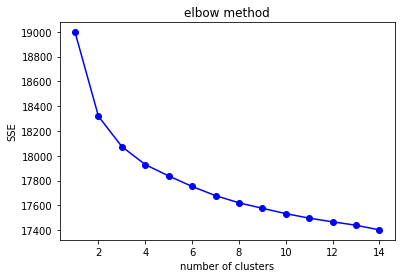

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# elbow method to decide k value (# of clusters)
def elbow(data, length):
    sse = [] # sum of squre error
    for i in range(1, length):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        # store sse value
        sse.append(kmeans.inertia_)
    plt.plot(range(1, length), sse, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()
elbow(ftr_vect, 15)

In [14]:
# K-means, cluster = 4

kmeans = KMeans(n_clusters=4, max_iter=50, random_state=45)

cluster_label = kmeans.fit_predict(ftr_vect)

data77['cluster_label'] = cluster_label
data77

,review_text,review_text_all,cluster_label
0,A lot of foam. But a lot. In the smell some ba...,A lot of foam. But a lot. In the smell some ba...,1
4,"According to the website, the style for the Ca...","According to the website, the style for the Ca...",1
5,Poured from the bottle into a Chimay goblet. A...,Poured from the bottle into a Chimay goblet. A...,1
6,"22 oz bottle from ""Lifesource"" Salem. $3.95 Ni...","22 oz bottle from ""Lifesource"" Salem. $3.95 Ni...",1
7,"Bottle says ""Malt beverage brewed with Ginger ...","Bottle says ""Malt beverage brewed with Ginger ...",1
...,...,...,...
528639,My taste is definitely not as refined as most ...,My taste is definitely not as refined as most ...,3
528713,A - Dark Redish Brown - out of the cask flatis...,A - Dark Redish Brown - out of the cask flatis...,0
528746,The first thing I liked about the porter was t...,The first thing I liked about the porter was t...,3
528765,"Pleasant, highly quaffable, session ale. Relat...","Pleasant, highly quaffable, session ale. Relat...",0


2) text clustering

In [20]:
data777 = beerdata[['review_profileName', 'beer_name', 'beer_style', 'review_text']]
data777.dropna()

,review_profileName,beer_name,beer_style,review_text
0,stcules,Sausa Weizen,Hefeweizen,A lot of foam. But a lot. In the smell some ba...
1,stcules,Red Moon,English Strong Ale,"Dark red color, light beige foam, average. In ..."
2,stcules,Black Horse Black Beer,Foreign / Export Stout,"Almost totally black. Beige foam, quite compac..."
3,stcules,Sausa Pils,German Pilsener,"Golden yellow color. White, compact foam, quit..."
4,johnmichaelsen,Cauldron DIPA,American Double / Imperial IPA,"According to the website, the style for the Ca..."
...,...,...,...,...
528865,orangemoustache,Dinkel Acker Dark,Munich Dunkel Lager,"A-pours a reddish amber that looks very nice,l..."
528866,MisterStout,Dinkel Acker Dark,Munich Dunkel Lager,I don't really have anything special to say ab...
528867,meechum,Dinkel Acker Dark,Munich Dunkel Lager,Had this on tap at Vreny's Beirgarten A - Came...
528868,Dodo2step,Dinkel Acker Dark,Munich Dunkel Lager,"Purchased at Market Cross Pub in carlisle, PA...."


In [21]:
data777['review_text'] = data777.review_text.values.astype(str)

/Users/dykim/opt/anaconda3/envs/Cornell/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
# tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import numpy as np
import nltk
import string
# dict(key, value), key = ord(value):ASCII
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

# make a list of original words that are tokenized
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]
# make a list of tokenized words
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

# Tf-idf vecterization, cusotmized tokenization, original words as tokenizer parameter
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize,
                            stop_words='english', ngram_range=(1,2),
                            min_df=0.05, max_df=0.85)

ftr_vect = tfidf_vect.fit_transform(data777['review_text'])

/Users/dykim/opt/anaconda3/envs/Cornell/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


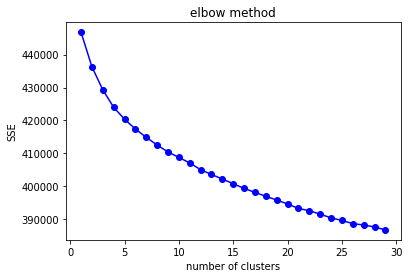

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# elbow method to decide k value (# of clusters)
def elbow(data, length):
    sse = [] # sum of squre error
    for i in range(1, length):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        # store sse value
        sse.append(kmeans.inertia_)
    plt.plot(range(1, length), sse, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()
elbow(ftr_vect, 30)

In [25]:
# K-means, cluster = 27

kmeans = KMeans(n_clusters=27, max_iter=50, random_state=45)

cluster_label = kmeans.fit_predict(ftr_vect)

data777['cluster_label'] = cluster_label
data777

/Users/dykim/opt/anaconda3/envs/Cornell/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,review_profileName,beer_name,beer_style,review_text,cluster_label
0,stcules,Sausa Weizen,Hefeweizen,A lot of foam. But a lot. In the smell some ba...,26
1,stcules,Red Moon,English Strong Ale,"Dark red color, light beige foam, average. In ...",24
2,stcules,Black Horse Black Beer,Foreign / Export Stout,"Almost totally black. Beige foam, quite compac...",24
3,stcules,Sausa Pils,German Pilsener,"Golden yellow color. White, compact foam, quit...",19
4,johnmichaelsen,Cauldron DIPA,American Double / Imperial IPA,"According to the website, the style for the Ca...",22
...,...,...,...,...,...
528865,orangemoustache,Dinkel Acker Dark,Munich Dunkel Lager,"A-pours a reddish amber that looks very nice,l...",12
528866,MisterStout,Dinkel Acker Dark,Munich Dunkel Lager,I don't really have anything special to say ab...,8
528867,meechum,Dinkel Acker Dark,Munich Dunkel Lager,Had this on tap at Vreny's Beirgarten A - Came...,5
528868,Dodo2step,Dinkel Acker Dark,Munich Dunkel Lager,"Purchased at Market Cross Pub in carlisle, PA....",5
